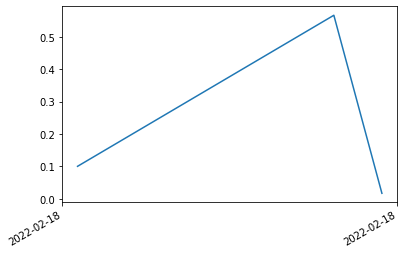

In [21]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="admin",
  password="pass123",
  database="rapid_tracing"
)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

def get_user_picture_time_records_chart(user_id, picture_id):
  cursor = mydb.cursor()
  cursor.execute("call get_user_picture_time_records(%s, %s)", (user_id, picture_id))
  result = cursor.fetchall()
  N = len(result)
  x = [dt.datetime.strptime(str(record[2]), "%Y-%m-%d %H:%M:%S") for record in result]
  y = [record[1] for record in result]
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
  date_interval = max(1, int(N/10))
  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
  plt.plot(x, y)
  plt.gcf().autofmt_xdate()
  plt.show()

get_user_picture_time_records_chart(1, 2)

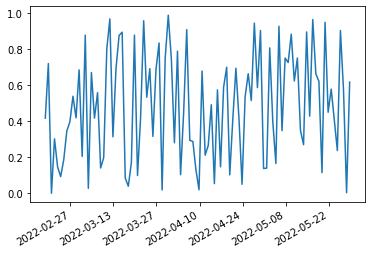

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

np.random.seed(1)

N = 100
y = np.random.rand(N)

now = dt.datetime.now()
then = now + dt.timedelta(days=100)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=int(N/7)))
plt.plot(days,y)
plt.gcf().autofmt_xdate()
plt.show()